['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


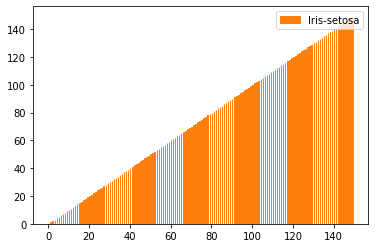

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df1 =pd.read_csv("c:\\users\\ganesh\\iris.csv")
r1=np.arange(len(df1[['Species']]))
wdth=0.25
r2 = [x + wdth for x in r1]
participants = df1.groupby(by=['Species']).sum()
ln=df1['Species'].unique()
print(ln)
#@plt.bar(ln,r1 , color="#1f77b4", width=wdth, edgecolor='#1f77b4',label=ln)
plt.bar(r2,r1 , color="#ff7f0e", width=wdth, edgecolor='#ff7f0e',label=ln) 
plt.legend(ln,loc='upper right')
plt.show()

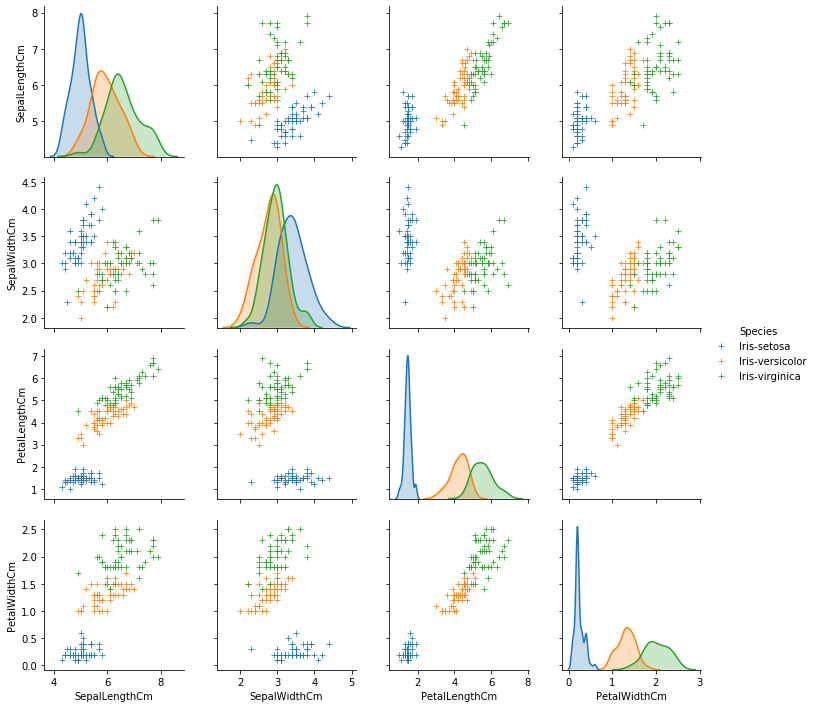

In [3]:
tmp = df1.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

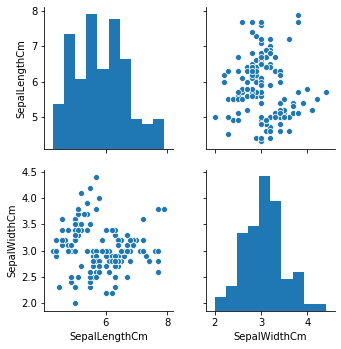

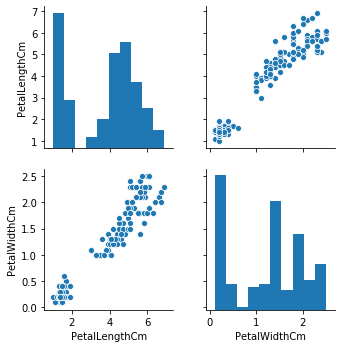

In [4]:
g = sns.pairplot(df1, vars=["SepalLengthCm", "SepalWidthCm"])
g1 = sns.pairplot(df1, vars=["PetalLengthCm", "PetalWidthCm"])

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['Species']= label_encoder.fit_transform(df1['Species']) 
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df1.iloc[:, [1,2,3,4]], df1.iloc[:, [5]], test_size=0.3,random_state=2) 
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) 

C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
from sklearn.linear_model import LogisticRegression
predictions = logmodel.predict(X_test)
print(predictions)

[0 0 2 0 0 2 0 2 2 0 0 0 0 0 2 1 0 1 2 1 2 1 2 1 1 0 0 2 0 2 2 0 1 2 2 0 2
 1 1 2 1 1 2 1 0]


[[17  0  0]
 [ 0 12  0]
 [ 0  3 13]]
93.33333333333333 2


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


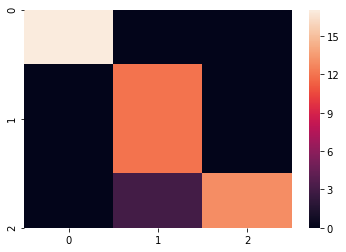

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cmf=confusion_matrix(predictions,y_test)
print(cmf)
print(accuracy_score(y_test,predictions)* 100, 2)
sns.heatmap(cmf)
df1

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.80      0.89        15
           2       0.81      1.00      0.90        13

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.95      0.93      0.93        45

